In [1]:
include("common.jl")
using PSet1Common

In [2]:
sp1 = PeriodicSpline(1.0, [0, 1, 0, -1])

PSet1Common.PeriodicSpline{Float64}(1.0,[0.0,1.0,0.0,-1.0],[1.5,-5.921189464667501e-17,-1.4999999999999998,-6.476300976980079e-17])

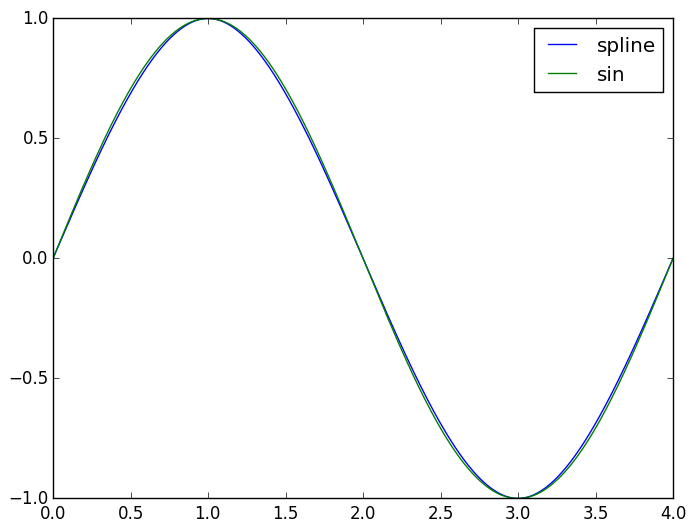

PyObject <matplotlib.legend.Legend object at 0x7fdaaa1d3e10>

In [3]:
xs = linspace(0, 4, 1000)
spy1 = sp1(xs)

plot(xs, spy1, label="spline")
plot(xs, sin(xs * π / 2), label="sin")
legend()

In [4]:
sp2 = PeriodicSpline(1.0, [1, 0, -1, 0])

PSet1Common.PeriodicSpline{Float64}(1.0,[1.0,0.0,-1.0,0.0],[5.551115123125783e-17,-1.5,1.189524669241239e-16,1.4999999999999998])

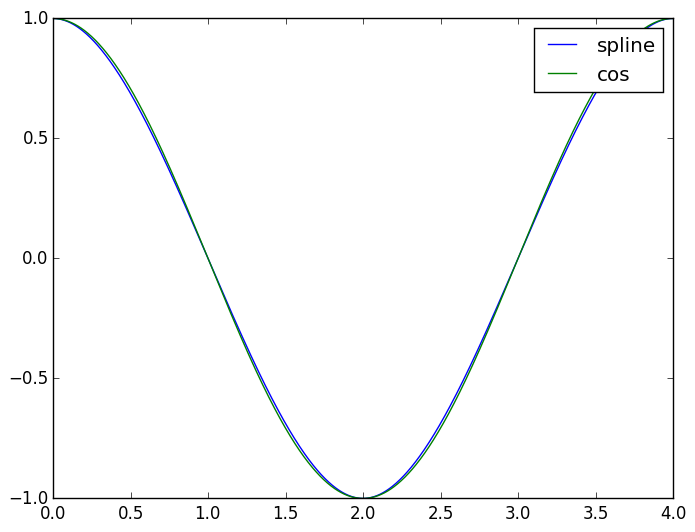

PyObject <matplotlib.legend.Legend object at 0x7fdaa6888cc0>

In [5]:
spy2 = sp2(xs)

plot(xs, spy2, label="spline")
plot(xs, cos(xs * π / 2), label="cos")
legend()

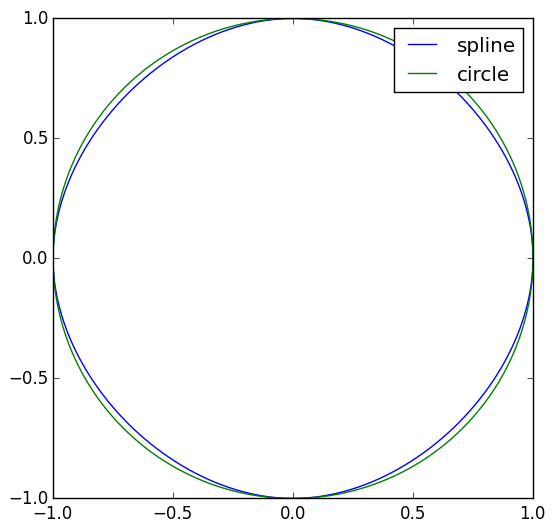

PyObject <matplotlib.legend.Legend object at 0x7fdaa67fe320>

In [6]:
plot(spy1, spy2, label="spline")
plot(sin(xs * π / 2), cos(xs * π / 2), label="circle")
gca()[:set_aspect]("equal")
legend()

In [7]:
π_est = enclosed_area(spy1, spy2)

3.0499799599785256

* A more precise estimation of $\pi$

    (since it's too trival to do...)

In [8]:
x1000 = linspace(0, 4, 1001)
dx1000 = step(x1000)
sps1000 = PeriodicSpline(dx1000, Float64[sin(x * π / 2) for x in xs])
spc1000 = PeriodicSpline(dx1000, Float64[cos(x * π / 2) for x in xs])

PSet1Common.PeriodicSpline{Float64}(0.004,[1.0,0.99998,0.999921,0.999822,0.999684,0.999506,0.999288,0.999031,0.998734,0.998398  …  0.998398,0.998734,0.999031,0.999288,0.999506,0.999684,0.999822,0.999921,0.99998,1.0],[-7.23955e-6,-3.76174e-5,-7.96327e-5,-0.000118526,-0.000158251,-0.000197745,-0.000237291,-0.000276812,-0.000316327,-0.000355827  …  0.000355827,0.000316327,0.000276812,0.000237291,0.000197745,0.000158251,0.000118526,7.96327e-5,3.76174e-5,7.23955e-6])

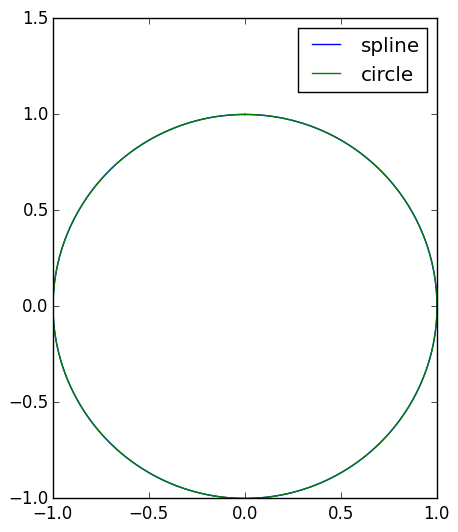

PyObject <matplotlib.legend.Legend object at 0x7fdaa67cff60>

In [9]:
x1000000 = linspace(0, 4, 1000_000)

spsy1000 = sps1000(x1000000)
spcy1000 = spc1000(x1000000)

# These has to agree on the plot since we already sample more points than
# the resolution.... ;-p
plot(spsy1000, spcy1000, label="spline")
plot(sin(xs * π / 2), cos(xs * π / 2), label="circle")
gca()[:set_aspect]("equal")
legend()

In [10]:
π_est2 = enclosed_area(spsy1000, spcy1000)

3.141592639340089

In [11]:
δπ = π_est2 - π

-1.4249704083368897e-8

In [12]:
δπ / π

-4.535821684929851e-9